In [ ]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 3.1 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=69659b92f38c93063f7045ae34fb6555c5ad4ff7f0b8e1016e663aa766542fb9
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=965cd83d5045c712639e5e7cfa876114e89694f8f2245058d32a5d3d549edfd7
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from fancyimpute import IterativeImputer

### 결측치를 포함한 예시 데이터 만들기

In [ ]:
np.random.seed(0)
sample_data = np.random.normal(1,10,100)
sample_data

array([ 18.64052346,   5.00157208,  10.78737984,  23.40893199,
        19.6755799 ,  -8.7727788 ,  10.50088418,  -0.51357208,
        -0.03218852,   5.10598502,   2.44043571,  15.54273507,
         8.61037725,   2.21675016,   5.43863233,   4.33674327,
        15.94079073,  -1.05158264,   4.13067702,  -7.54095739,
       -24.52989816,   7.53618595,   9.64436199,  -6.4216502 ,
        23.69754624, -13.54365675,   1.45758517,  -0.8718385 ,
        16.32779214,  15.6935877 ,   2.54947426,   4.7816252 ,
        -7.87785748, -18.80796468,  -2.47912149,   2.56348969,
        13.30290681,  13.02379849,  -2.87326817,  -2.02302751,
        -9.48552965, -13.20017937, -16.06270191,  20.50775395,
        -4.09652182,  -3.38074302, -11.5279536 ,   8.77490356,
       -15.13897848,  -1.1274028 ,  -7.95466561,   4.86902498,
        -4.10805138, -10.80632184,   0.71817772,   5.28331871,
         1.66517222,   4.02471898,  -5.34322094,  -2.62741166,
        -5.72460448,  -2.59553162,  -7.13146282, -16.26

In [ ]:
df = pd.DataFrame(sample_data, columns=['feature'])
df.loc[10:30, 'feature']=np.nan
df.loc[55:60, 'feature']=np.nan
df.loc[80:85, 'feature']=np.nan

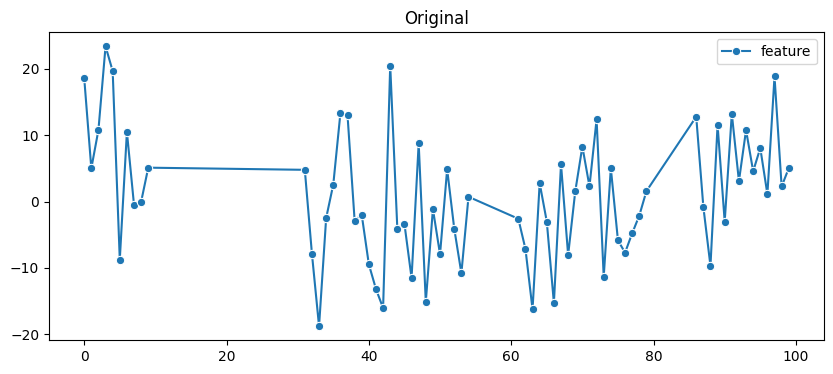

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df, marker='o')
plt.title('Original')
plt.show()

### 1차 선형보간법
 - interpolate 함수로 결측치 보간
 - 기본적인 선형보간 외에도 method 인자를 사용해 보간 방법 지정 가능
    - (method='polynomial', order=2)는 2차 다항 보간

In [ ]:
df_linear = df.interpolate(method='linear')

### 2차 선형보간법

In [ ]:
df_quadratic = df.interpolate(method='quadratic')

### 평균대치법
- 평균은 중심에 대한 경향성을 알 수 있는 척도이지만 모든 관측치값을 반영하므로 이상치의 영향을 많이 받는다.
- 평균을 이용하기 때문에 수치형 변수만 사용 가능
- strategy 인자를 사용해 대치법 지정 가능
  - mean(평균)
  - median(중앙값)
  - most_frequent(최빈값, 빈도수 사용하기 때문에 범주형 변수에만 사용 가능)

In [ ]:
imputer_mean = SimpleImputer(strategy = 'mean')
df_mean = imputer_mean.fit_transform(df1)
df_mean = pd.DataFrame(df_mean, columns = ['feature'])

In [ ]:
imputer_mean = SimpleImputer(strategy = 'most_frequent')
df_mean = imputer_mean.fit_transform(df)

### fillna()를 이용해서 0으로 대체
  - fillna() 안에 원하는 값 넣을 수 있음

In [ ]:
df_zero = df.fillna(0)

### KNN 방법

- KNN이란?
  - 패턴 인식에서 k-최근접 이웃 알고리즘은 분류나 회귀에 사용되는 비모수 방식
  - KNNImputer를 활용하여 원하는 인접 이웃 수의 가중 또는 가중 평균을 사용하여 결측값 대치

    → 결측치를 기준으로 두 이웃(n_neighbors = 2)의 근사값으로 채워짐

In [ ]:
imputer_knn = KNNImputer(n_neighbors = 2)
df_knn = imputer_knn.fit_transform(df)
df_knn = pd.DataFrame(df_knn, columns=['feature'])

### MICE 다중대치법
- 결측값을 회귀하는 방식으로 처리하기 때문에 수치형 변수에 자주 사용함
- 범주형 변수에는 먼저 인코딩 후 사용 가능

In [ ]:
mice_imputer = IterativeImputer()
df_mice = mice_imputer.fit_transform(df)
df_mice = pd.DataFrame(df_mice, columns=['feature'])

In [ ]:
df_quadratic[5:10]

,feature
5,-8.772779
6,10.500884
7,-0.513572
8,-0.032189
9,5.105985


- 결측치를 확인하는 과정에서는 데이터의 도메인 지식이 필요하다

  → 결측치가 유의미한 데이터일 수도 있기 때문

- 결측치를 삭제하는 방법으로 처리하는 것은 리스크가 따를 수 있음

  → 데이터의 누락으로 이어질 수 있기 때문

#### 시각화를 통해 어떤 식으로 변환하는지 확인

Text(0.5, 1.0, 'df_mice')

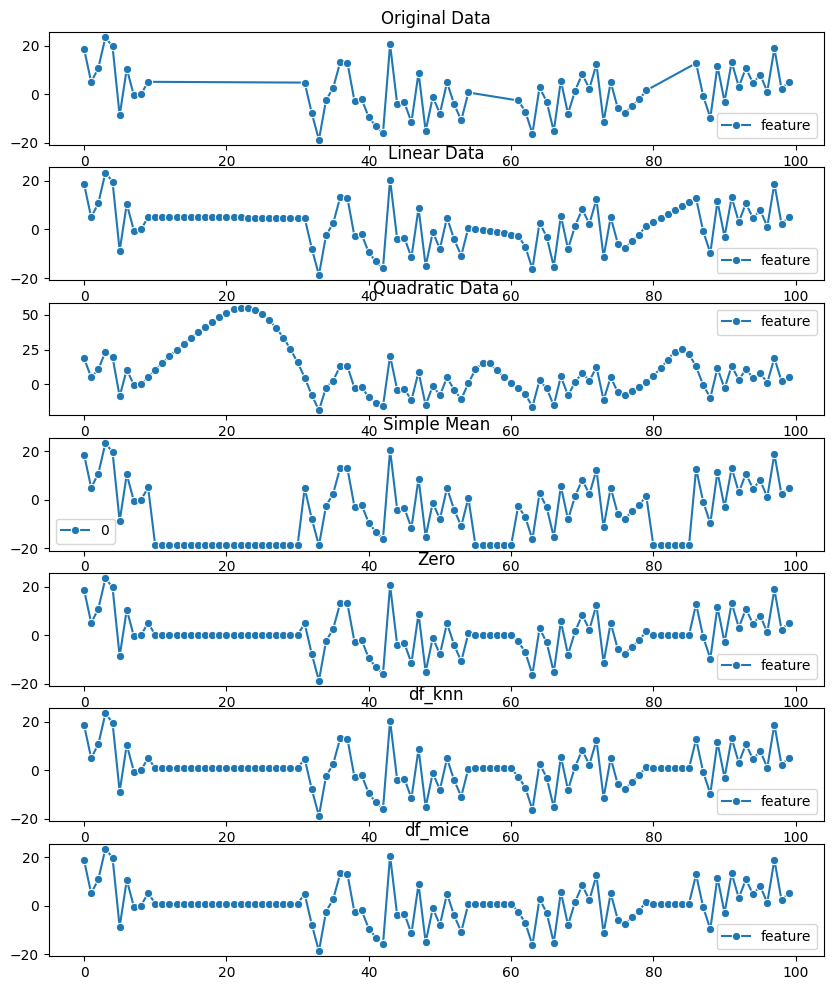

In [ ]:
fig, axs = plt.subplots(7,1,figsize=(10,12))
sns.lineplot(data= df, marker='o', ax=axs[0], legend='auto')
axs[0].set_title('Original Data')
sns.lineplot(data=df_linear , marker='o', ax=axs[1], legend='auto')
axs[1].set_title('Linear Data')
sns.lineplot(data=df_quadratic , marker='o', ax=axs[2], legend='auto')
axs[2].set_title('Quadratic Data')
sns.lineplot(data=df_mean , marker='o', ax=axs[3], legend='auto')
axs[3].set_title('Simple Mean')
sns.lineplot(data=df_zero , marker='o', ax=axs[4], legend='auto')
axs[4].set_title('Zero')
sns.lineplot(data=df_knn , marker='o', ax=axs[5], legend='auto')
axs[5].set_title('df_knn')
sns.lineplot(data=df_mice , marker='o', ax=axs[6], legend='auto')
axs[6].set_title('df_mice')

- 결측치를 보간하고 데이터 분석, 모델링 할 때 성능을 비교할 수 있음